In [1]:
import numpy as np
import xmlTranslator as xmlT
from tqdm import tqdm
%reload_ext autoreload
%autoreload 2
import importlib
from utils import get_project_root
from ipywidgets import FloatProgress

TODO: 
- Repeat the sequences 3 times
- Extend all chords into 18 enharmonic
- Complete the voicing as a MIDI array 
- Split into train and test
- Pass the MIDI into Embeddings

In [43]:
directory = '/data/iRealXML'
root = get_project_root()
myPath = str(root) + str(directory)

theChordDataset, theDurationsDataset, all_meta = xmlT.parse_info_from_XML(myPath)

  0%|          | 0/4007 [00:00<?, ?it/s]

(4006,) (4006,) (4006,)


In [62]:
#Correct the location of 'e||'
dataset = []
dataset_durations = []
for i, song in enumerate(theChordDataset):
    d = theDurationsDataset[i]
    song, durations = xmlT.correct_coda_end(song, d)
    dataset.append(song)
    dataset_durations.append(durations)
print(len(dataset), len(dataset_durations))

4006 4006


In [101]:
id = 204
print(all_meta[id])
print(len(dataset[id]))
print(dataset[id].tolist())

{'composer': 'Israel Houghton', 'style': 'Worship', 'song_name': 'Alpha And Omega', 'tonality': 'Db major', 'midi_key': 13, 'time_signature': '4/4', 'decade': 'Null'}
134
['<style>', 'Worship', 'Form_A', '|:', '.', 'Db', 'major', '|', '.', 'Ab', 'major', '/', 'C', '.', 'Db', 'major', '.', 'Eb', 'minor-seventh', '|', '.', 'Db', 'major', '.', 'Db', 'major', '/', 'F', '|', '.', 'Gb', 'major', '.', 'Eb', 'minor', '/', 'Gb', '.', 'Eb', 'minor', '|', '.', 'Db', 'major', '/', 'Ab', '.', 'Db', 'major', '/', 'Ab', '.', 'Bb', 'minor', '/', 'Ab', '|', '.', 'Ab', 'major', '.', 'Bb', 'minor', '.', 'Ab', 'major', '/', 'C', '|', '.', 'Db', 'major', '.', 'C', 'minor-seventh', 'alter b5', '.', 'F', 'dominant', 'Form_B', '|', '.', 'Bb', 'minor', '|', '.', 'Ab', 'major', '.', 'Gb', 'major', '|', '.', 'Db', 'major', '/', 'F', '|', '.', 'Gb', 'major', '.', 'Eb', 'minor', '/', 'Gb', '.', 'Eb', 'minor', '|', '.', 'Db', 'major', '/', 'Ab', '|', '.', 'Ab', 'major', '.', 'Bb', 'minor', '.', 'Ab', 'major', '/', 

In [103]:
#Expand song structure
importlib.reload(xmlT)

id = 0
expand_form_dataset = []
expand_duration_dataset = []
status = True
for i in tqdm(range(len(dataset))):
    song_structure, duration_structure, status = xmlT.expand_song_structure(dataset[i], dataset_durations[i], i, False)
    if status == False:
        print('Song:', all_meta[i])
        id = i
        break
    song_structure = np.array(song_structure)
    duration_structure = np.array(duration_structure)
    expand_form_dataset.append(song_structure)
    expand_duration_dataset.append(duration_structure)

#check if all elements are the same size
for i in range(len(expand_form_dataset)):
    if len(expand_form_dataset) != len(expand_duration_dataset):
        print('Error in:', i)
        break

 14%|█▍        | 563/4006 [00:00<00:01, 2827.26it/s]

100%|██████████| 4006/4006 [00:01<00:00, 2696.97it/s]


In [106]:
print(dataset[4005].tolist())

['<style>', 'Ballad', 'Form_A', '|', '.', 'C', 'major', '.', 'E', 'minor', '/', 'B', '|', '.', 'B', 'suspended-fourth', '.', 'B', 'major', '.', 'B', 'major', '/', 'A', '|', '.', 'G', 'major', '.', 'C', 'major-seventh', '|', '.', 'C#', 'minor-seventh', 'alter b5', '.', 'G', 'major-seventh', '/', 'D', '|', '.', 'D', 'major', '/', 'F#', '.', 'C', 'major', '/', 'E', '|', '.', 'C', 'minor', '/', 'Eb', '.', 'G', 'major', '/', 'D', '|', '.', 'C#', 'minor-seventh', 'alter b5', '.', 'F#', 'dominant', '/', 'C#', '|', '.', 'B', 'major', '.', 'A', 'minor-seventh', '.', 'D', 'dominant', '/', 'A', 'Form_B', '|', '.', 'G', 'major', 'add 9', '.', 'D', 'major', '/', 'F#', '|', '.', 'C', 'major-seventh', '/', 'E', '.', 'C#', 'minor-seventh', 'alter b5', '|', '.', 'G', 'major', '/', 'D', '.', 'B', 'dominant', '/', 'D#', '|', '.', 'G', 'dominant', '/', 'D', '.', 'A', 'dominant', '/', 'C#', 'Form_Coda', '|', '.', 'C', 'major-seventh', '.', 'A', 'minor-seventh', 'e||', '.', 'B', 'minor-seventh', '.', 'E', '

In [107]:
sub_sections = dataset[4004:4005]
sub_durations = dataset_durations[4004:4005]
for i in range(len(sub_sections)):
    a,b,s = xmlT.expand_song_structure(sub_sections[i], sub_durations[i], i, True)
print(a)

IndexError: list index out of range

In [149]:
id = 1202
print(all_meta[id])
print(theChordDataset[id])
print(len(expand_form_dataset[id]))
print(expand_form_dataset[id].tolist())

{'composer': 'The Beatles (Lennon, McCartney)', 'style': 'Rock Pop', 'song_name': 'Eleanor Rigby', 'tonality': 'E minor', 'midi_key': 16, 'time_signature': '4/4', 'decade': 'Null'}
['<style>' 'Rock Pop' 'Form_intro' '|:' '.' 'C' 'major' '|' '.' 'C'
 'major' '|' '.' 'E' 'minor' '|' '.' 'E' 'minor' ':|' 'Form_Segno' '|:'
 '.' 'E' 'minor' '|' '.' 'E' 'minor' '|' '.' 'E' 'minor' '|' '.' 'C'
 'major' '|' '.' 'C' 'major' '.' 'E' 'minor' '|' '.' 'E' 'minor' '|' '.'
 'E' 'minor' '|' '.' 'E' 'minor' '|' '.' 'C' 'major' '|' '.' 'C' 'major'
 '.' 'E' 'minor' 'Form_B' '|' '.' 'E' 'minor-seventh' '|' '.' 'E'
 'minor-sixth' '|' '.' 'C' 'major' '/' 'E' '|' '.' 'E' 'minor' '|' '.' 'E'
 'minor-seventh' '|' '.' 'E' 'minor-sixth' '|' '.' 'C' 'major' '/' 'E'
 'Form_Coda' 'e||' '.' 'E' 'minor' ':|' 'Form_C' '|:' '.' 'C' 'major' '|'
 '.' 'C' 'major' '|' '.' 'E' 'minor' '|' '.' 'E' 'minor' ':|' 'Form_Coda'
 'b||' '.' 'E' 'minor']
161
['<style>', 'Rock Pop', 'Form_intro', '|', '.', 'C', 'major', '|', '.', 'C',

In [150]:
seq = theChordDataset[id]

def extend_music_sequence(seq):
    extended_seq = []
    repeats = []
    coda_jump_from = None
    coda_jump_to = None
    in_repeat = False

    # First pass: Handle repeats and mark coda positions
    for i, element in enumerate(seq):
        if element == '|:':
            repeats.append(i)
            in_repeat = True
        elif element == ':|' and in_repeat:
            # Repeat the section
            repeat_section = seq[repeats.pop():i+1]
            extended_seq.extend(repeat_section)
            in_repeat = False
        elif 'Form_Coda' in element:
            if 'e||' in seq[i+1]:  # Mark the coda jump from position
                coda_jump_from = len(extended_seq)
            elif 'b||' in seq[i+1]:  # Mark the coda jump to position
                if coda_jump_to is None:  # Ensure only the first coda jump to position is recorded
                    coda_jump_to = len(extended_seq)
            extended_seq.append(element)  # Keep coda markers for clarity in the extended sequence
        else:
            extended_seq.append(element)

        if not in_repeat and i > repeats[-1] if repeats else True:
            # This ensures we extend the sequence outside of repeats normally
            extended_seq.append(element)

    # Second pass: Coda jump
    # Jump from the first Form_Coda (e||) to the second Form_Coda (b||)
    if coda_jump_from is not None and coda_jump_to is not None:
        coda_section = extended_seq[coda_jump_to:]
        extended_seq = extended_seq[:coda_jump_from] + coda_section

    return extended_seq

extended_seq = extend_music_sequence(seq)
print(len(extended_seq))
print(extended_seq)



129
['<style>', '<style>', 'Rock Pop', 'Rock Pop', 'Form_intro', 'Form_intro', '.', 'C', 'major', '|', '.', 'C', 'major', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|:', '.', 'C', 'major', '|', '.', 'C', 'major', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor', ':|', ':|', 'Form_Segno', 'Form_Segno', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|', '.', 'C', 'major', '|', '.', 'C', 'major', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor', '|', '.', 'C', 'major', '|', '.', 'C', 'major', '.', 'E', 'minor', 'Form_B', '|', '.', 'E', 'minor-seventh', '|', '.', 'E', 'minor-sixth', '|', '.', 'C', 'major', '/', 'E', '|', '.', 'E', 'minor', '|', '.', 'E', 'minor-seventh', '|', '.', 'E', 'minor-sixth', '|', '.', 'C', 'major', '/', 'E', 'Form_Coda', 'Form_Coda', 'b||', 'b||', '.', '.', 'E', 'E', 'minor', 'minor']


In [151]:
#Unify chord and duration into a tuple of good friends
dataset = []
for chords_values, durations_values in zip(expand_form_dataset, expand_duration_dataset):
    coupled = list(zip(chords_values, durations_values))
    dataset.append(coupled)
    
print(np.array(dataset[1202]))

[['<style>' '0.0']
 ['Rock Pop' '0.0']
 ['Form_intro' '0.0']
 ['|' '0.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '0.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '0.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['Form_Segno' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['minor' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['major' '4.0']
 ['|' '4

In [152]:
importlib.reload(xmlT)

#correct the wrong chords
corrected_sequence = xmlT.replaceTheseChords(dataset, False)

  0%|          | 0/4006 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
id = 1202
print(np.array(corrected_sequence[id]))

[['<style>' '0.0']
 ['Rock Pop' '0.0']
 ['Form_intro' '0.0']
 ['|' '0.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['C' '4.0']
 ['maj' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['Form_Segno' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m' '4.0']
 ['|' '4.0']
 ['.' '4.0']
 ['E' '4.0']
 ['m

In [ ]:
#clean the elements that are ''
dataset = [[tup for tup in inner_list if tup[0] != ''] for inner_list in corrected_sequence]

print(len(dataset))
print(dataset[0])

for song in dataset:
    for i, e in enumerate(song):
        if e[0] == '':
            print(song)
            print(i)
            break

4006
[('<style>', 0.0), ('Medium Swing', 0.0), ('|', 0.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A', 2.0), ('m7', 2.0), ('.', 2.0), ('D', 2.0), ('dom7', 2.0), ('|', 2.0), ('.', 4.0), ('G', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A', 2.0), ('m7', 2.0), ('.', 2.0), ('D', 2.0), ('d

In [ ]:
'''
This section is important to define a more concise format and tokenization.
Fix the format of extensions to avoid repeated elements
'''

xmlT.fix_extensions(dataset)

  0%|          | 0/4006 [00:00<?, ?it/s]

In [ ]:
#Check vocabulary
chords_array = [[item[0] for item in row] for row in dataset]
concatenated_array = np.hstack(chords_array) 
vocab = set(concatenated_array)

print(len(vocab))
print(np.array(vocab))

202
{'A#', 'Afoxé', 'Bossa Nova', 'Repeat_0', 'Fusion', 'alter b9', '<style>', 'add b13', 'alter #11', 'March', 'Form_B', 'Pop Folk', 'Rock Blues', 'm6', 'Medium Country', 'Tango', 'Bolero', 'Pop', 'Bolero-Son', 'sus4', 'Up Waltz (One Feel)', 'Slow Shuffle', 'Shuffle Blues', 'Electro Pop', 'Db', 'Bolero-Cha', 'Rock Pop', 'Moderate Latin', "R'n'B", 'Up Tempo', 'Electric Blues', 'Dreamlike', ':|', 'N.C.', 'RnB', 'Maxixe', 'Up Swing', 'G', 'Latin-Swing', 'alter #9', 'm', 'Samba', 'Afro', 'Reggae', 'Hymn', 'add 13', 'Waltz', 'Medium Funk', 'add #11', 'add #7', 'Gypsy Swing', 'Up Samba', 'Medium Swing', 'Form_A', 'Baião', 'Pop-Shuffle', 'maj7', 'Pop Shuffle', 'Country Blues', 'Salsa', 'Choro - Samba', 'Bossa Acoustic', 'Country Ballad', 'Gary Aprile', 'Rock/Reggae', 'Mambo', 'maj6', 'Form_intro', 'power', 'Repeat_2', 'sus7', 'Medium Shuffle', 'Medium Up', 'A', 'maj', 'Merengue', 'Reggae Pop', 'Beatles', 'E', 'Rock Ballad', 'Deliberately', 'Slow Ballad', 'Worship', 'Slowly', 'Folk Ballad', '

In [ ]:
id = 2021
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

['<style>', 'Funk', 'Form_intro', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '|', 'Form_Segno', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Bb', 'dom7', 'add 9', '|', '.', 'Eb', 'maj7', '|', '.', 'Eb', 'maj7', '|', '|', '.', 'Eb', 'maj7', '.', 'A', 'dom7', 'alter b5', '

In [ ]:
#Find duplicated 'add' or 'alter' elements and remove them

def correctDuplicatedExtensions(sequence):
    structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.'}

    for x, song in tqdm(enumerate(sequence)):
        for y, item in enumerate(song):
            e = item[0]
            if '.' in e:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper][0]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        elif stepper < len(song)-1:
                            #print('Duplicated:', x, stepper, element, check_extensions)
                            song.pop(stepper)
                        stepper += 1
                if len(check_extensions) > 2:
                    continue
                    print(x, y+stepper, check_extensions)
                
correctDuplicatedExtensions(dataset)
id = 0
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

4006it [00:00, 8906.67it/s]

['<style>', 'Medium Swing', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'dom7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'Gb', 'o', '|', '.', 'Gb', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'm7', '

In [ ]:
'''
This sequences have some elements that are repeated and should be removed
If the code is run twice, no print should be shown
'''
import voicing as vc

fix_this = [{'seq': ['dom7', 'sus7', 'add b9'], 'remove': 'dom7'},
            {'seq': ['sus7', 'add 13', 'sus4'], 'remove': 'sus4'},
            {'seq': ['sus7', 'add 9', 'sus4'], 'remove': 'sus4'},
            {'seq': ['m', 'add 6', 'add 9', 'sus4'], 'remove': 'sus4'},
            {'seq': ['sus7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'},
            {'seq': ['dom7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'}]

structural_elements = vc.Voicing().getStructuralElements()

for x, song in enumerate(dataset):
    for y, e in enumerate(song):
        if '.' in e[0]:
            search = True
            stepper = y + 2
            check_extensions = []
            while search:
                if (stepper) >= len(song):
                    search = False
                    #print('End of song')
                    break
                elif stepper < len(song) - 1:
                    element = song[stepper][0]
        
                if element in structural_elements or element.startswith('Form_'):
                    search = False
                else:
                    if element not in check_extensions:
                        check_extensions.append(element)
                    for item in fix_this:
                        if check_extensions == item['seq']:
                            print(x, stepper, check_extensions, 'to remove:', item['remove'])
                            #find the location of the element in the array
                            for i in range(len(check_extensions)):
                                if check_extensions[i] == item['remove']:
                                    location = i + stepper - 2
                                    #erase this element from song
                                    if location < len(song):
                                        print(location, item['remove'], song[location])
                                        song.pop(location)
                                    break
                            
                    stepper += 1



{'N.C.', '.', 'b||', '||', '|', '/', 'e||', ':|', '|:'}


In [ ]:
id = 0
print(all_meta[id])
print(dataset[id])


{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Medium Swing', 'song_name': "'S Wonderful", 'tonality': 'Eb major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
[('<style>', 0.0), ('Medium Swing', 0.0), ('|', 0.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A',

In [ ]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)


Max: {'v': 1423, 'id': 141} Min: {'v': 31, 'id': 3331}


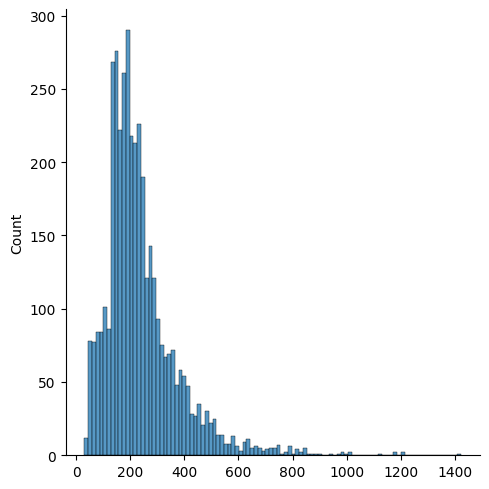

In [ ]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=False, bins=100)

In [ ]:
import voicing as vc
voicing = vc.Voicing()

print(all_meta[4005]['song_name'])
id = 0
for i, data in enumerate(all_meta):
    if 'Message To A Friend' in data['song_name']:
        id = i
        print(i)
        break

strings_array =  voicing.get_chords(dataset[id]) 
print(strings_array)


Message To A Friend
4005
['<style>', 'Ballad', 'Form_A', '|', '.', 'C', 'maj', '.', 'E', 'm', '/', 'B', '|', '.', 'B', 'sus4', '.', 'B', 'maj', '.', 'B', 'maj', '/', 'A', '|', '.', 'G', 'maj', '.', 'C', 'maj7', '|', '.', 'C#', 'm7', 'alter b5', '.', 'G', 'maj7', '/', 'D', '|', '.', 'D', 'maj', '/', 'F#', '.', 'C', 'maj', '/', 'E', '|', '.', 'C', 'm', '/', 'Eb', '.', 'G', 'maj', '/', 'D', '|', '.', 'C#', 'm7', 'alter b5', '.', 'F#', 'dom7', '/', 'C#', '|', '.', 'B', 'maj', '.', 'A', 'm7', '.', 'D', 'dom7', '/', 'A', 'Form_B', '|', '.', 'G', 'maj', 'add 9', '.', 'D', 'maj', '/', 'F#', '|', '.', 'C', 'maj7', '/', 'E', '.', 'C#', 'm7', 'alter b5', '|', '.', 'G', 'maj', '/', 'D', '.', 'B', 'dom7', '/', 'D#', '|', '.', 'G', 'dom7', '/', 'D', '.', 'A', 'dom7', '/', 'C#', 'Form_Coda', 'e||', '.', 'C', 'maj7', '.', 'A', 'm7', '|', '.', 'B', 'm7', '.', 'E', 'm7', 'add 9', '|', '.', 'C', 'maj', '/', 'D', '|', '.', 'C', 'maj', '/', 'D', '|', '.', 'C#', 'm7', 'alter b5', '.', 'G', 'maj', '/', 'D', 

In [ ]:
import voicing as vc

#check the voicing conversion of all chords
from_ = 0
to_ = 10
myTracks = dataset[from_:to_]
sub_names = []
for names in all_meta[from_:to_]:
    sub_names.append(names['song_name'])
voicing = vc.Voicing()
midi_voicing = []


i = 0
for item in tqdm(myTracks):
    mv, status = voicing.convert_chords_to_voicing(item)
    midi_voicing.append(mv)
    if status == False:
        print(i, '\n', all_meta[i], '\n', item)
        break
    i += 1
print(len(midi_voicing))
print(sub_names)

100%|██████████| 10/10 [00:00<00:00, 3868.93it/s]

10
["'S Wonderful", "'Tain't No Sin To Take Off Your Skin", "'Tain't What You Do (It's The Way That Cha Do It)", '101 Eastbound', '11 y 6 (Euforia)', '1612', '26-2', '500 Miles High', '502 Blues', '52nd Street Theme']


In [ ]:
voicing = vc.Voicing()

path = "../data/midi_files/"

for i in range(len(midi_voicing)):
    voicing.export_to_midi(midi_voicing[i], path, sub_names[i])


song: 'S Wonderful
MIDI file created! 
---------------------------------
song: 'Tain't No Sin To Take Off Your Skin
MIDI file created! 
---------------------------------
song: 'Tain't What You Do (It's The Way That Cha Do It)
MIDI file created! 
---------------------------------
song: 101 Eastbound
MIDI file created! 
---------------------------------
song: 11 y 6 (Euforia)
MIDI file created! 
---------------------------------
song: 1612
MIDI file created! 
---------------------------------
song: 26-2
MIDI file created! 
---------------------------------
song: 500 Miles High
MIDI file created! 
---------------------------------
song: 502 Blues
MIDI file created! 
---------------------------------
song: 52nd Street Theme
MIDI file created! 
---------------------------------


In [ ]:
id = 4005
print(all_meta[id])
print(theChordDataset[id])

{'composer': 'Pat Metheny', 'style': 'Ballad', 'song_name': 'Message To A Friend', 'tonality': 'C major', 'midi_key': 12, 'time_signature': '4/4', 'decade': 'Null'}
['<style>' 'Ballad' '|' 'Form_A' '.' 'C' 'major' '.' 'E' 'minor' '|' '.'
 'B' 'suspended-fourth' '.' 'B' 'major' '.' 'B' 'major' '|' '.' 'G'
 'major' '.' 'C' 'major-seventh' '|' '.' 'C#' 'minor-seventh' 'alter b5'
 '.' 'G' 'major-seventh' '|' '.' 'D' 'major' '/' 'F#' '.' 'C' 'major' '|'
 '.' 'C' 'minor' '/' 'Eb' '.' 'G' 'major' '|' '.' 'C#' 'minor-seventh'
 'alter b5' '.' 'F#' 'dominant' '/' 'C#' '|' '.' 'B' 'major' '/' 'C#' '.'
 'A' 'minor-seventh' '/' 'C#' '.' 'D' 'dominant' '|' 'Form_B' '.' 'G'
 'major' 'add 9' '.' 'D' 'major' '/' 'F#' '|' '.' 'C' 'major-seventh' '.'
 'C#' 'minor-seventh' 'alter b5' '|' '.' 'G' 'major' '.' 'B' 'dominant'
 '/' 'D#' '|' '.' 'G' 'dominant' '.' 'A' 'dominant' '/' 'C#' '|'
 'Form_Coda' '.' 'C' 'major-seventh' '/' 'C#' '.' 'A' 'minor-seventh' '/'
 'C#' '|' '.' 'B' 'minor-seventh' '/' 'C#' '.' 